In [ ]:
import os
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.getcwd()

'/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main'

In [ ]:
import pyspark
from pyspark.sql import SQLContext
from pyspark.rdd import RDD
from pyspark.sql import DataFrame
from pyspark.sql import functions
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

from pyspark.ml  import Pipeline
from pyspark.sql.functions import mean,col,split, col, regexp_extract, when, lit, count
import pyspark.sql.functions as f

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

#create session in order to be capable of accessing all Spark API
spark = SparkSession \
    .builder \
    .appName("Purchase") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
csv_files = glob("./*.csv")
csv_files

['./1997.csv',
 './airports.csv',
 './2000.csv',
 './2003.csv',
 './1999.csv',
 './1988.csv',
 './1990.csv',
 './1995.csv',
 './1987.csv',
 './1989.csv',
 './1992.csv',
 './1998.csv',
 './1994.csv',
 './1991.csv',
 './carriers.csv',
 './1993.csv',
 './2004.csv',
 './2002.csv',
 './2008.csv',
 './variable-descriptions.csv',
 './2007.csv',
 './2006.csv',
 './plane-data.csv',
 './2001.csv',
 './2005.csv',
 './1996.csv']

In [ ]:
import os
print(os.getcwd())

/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main


In [ ]:
!cd /content/drive/MyDrive


In [ ]:
!ls

1987.csv  1992.csv  1997.csv  2002.csv	2007.csv       Manku.ipynb
1988.csv  1993.csv  1998.csv  2003.csv	2008.csv       plane-data.csv
1989.csv  1994.csv  1999.csv  2004.csv	airports.csv   README.md
1990.csv  1995.csv  2000.csv  2005.csv	bigdata.ipynb  variable-descriptions.csv
1991.csv  1996.csv  2001.csv  2006.csv	carriers.csv


In [ ]:
os.getcwd()

'/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main'

In [ ]:
!ls

1987.csv  1992.csv  1997.csv  2002.csv	2007.csv       Manku.ipynb
1988.csv  1993.csv  1998.csv  2003.csv	2008.csv       plane-data.csv
1989.csv  1994.csv  1999.csv  2004.csv	airports.csv   README.md
1990.csv  1995.csv  2000.csv  2005.csv	bigdata.ipynb  variable-descriptions.csv
1991.csv  1996.csv  2001.csv  2006.csv	carriers.csv


In [ ]:
!cd /content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main

In [ ]:
!ls

1987.csv  1992.csv  1997.csv  2002.csv	2007.csv       Manku.ipynb
1988.csv  1993.csv  1998.csv  2003.csv	2008.csv       plane-data.csv
1989.csv  1994.csv  1999.csv  2004.csv	airports.csv   README.md
1990.csv  1995.csv  2000.csv  2005.csv	bigdata.ipynb  variable-descriptions.csv
1991.csv  1996.csv  2001.csv  2006.csv	carriers.csv


In [ ]:
import os
os.chdir('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/')
print(os.getcwd())  # Confirm the working directory


/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main


In [ ]:
ls

1987.csv  1992.csv  1997.csv  2002.csv  2007.csv       Manku.ipynb
1988.csv  1993.csv  1998.csv  2003.csv  2008.csv       plane-data.csv
1989.csv  1994.csv  1999.csv  2004.csv  airports.csv   README.md
1990.csv  1995.csv  2000.csv  2005.csv  bigdata.ipynb  variable-descriptions.csv
1991.csv  1996.csv  2001.csv  2006.csv  carriers.csv


In [ ]:
csv_files = glob("./*.csv")
csv_files

['./1997.csv',
 './airports.csv',
 './2000.csv',
 './2003.csv',
 './1999.csv',
 './1988.csv',
 './1990.csv',
 './1995.csv',
 './1987.csv',
 './1989.csv',
 './1992.csv',
 './1998.csv',
 './1994.csv',
 './1991.csv',
 './carriers.csv',
 './1993.csv',
 './2004.csv',
 './2002.csv',
 './2008.csv',
 './variable-descriptions.csv',
 './2007.csv',
 './2006.csv',
 './plane-data.csv',
 './2001.csv',
 './2005.csv',
 './1996.csv']

In [ ]:
os.getcwd()

'/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main'

In [ ]:
import os

# Updated condition for forward slash as path separator
flight_csv = sorted(
    [
        i for i in csv_files
        if len(os.path.basename(i).rsplit(".", 1)[0]) == 4  # Extract filename
    ]
)

print(flight_csv)


['./1987.csv', './1988.csv', './1989.csv', './1990.csv', './1991.csv', './1992.csv', './1993.csv', './1994.csv', './1995.csv', './1996.csv', './1997.csv', './1998.csv', './1999.csv', './2000.csv', './2001.csv', './2002.csv', './2003.csv', './2004.csv', './2005.csv', './2006.csv', './2007.csv', './2008.csv']


In [ ]:
import os

# Update file paths to absolute paths
base_path = "/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main"
flight_csv = [
    os.path.join(base_path, os.path.basename(file))
    for file in csv_files
    if len(os.path.basename(file).rsplit(".", 1)[0]) == 4
]

# Process files
c = 0
for file in flight_csv:
    if c == 0:
        df = spark.read.csv(file, header="true")
    else:
        df_temp = spark.read.csv(file, header="true")
        df = df.unionByName(df_temp)
        print((file, df.count(), len(df.columns)))
    c += 1


('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/2000.csv', 11094890, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/2003.csv', 17583430, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/1999.csv', 23111314, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/1988.csv', 28313410, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/1990.csv', 33584303, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/1995.csv', 38911738, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/1987.csv', 40223564, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/1989.csv', 45264764, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/1992.csv', 50356921, 29)
('/content/Leveraging-Big-Data-Analytics-in-Aviation-Industry-PySpark-main/1998.csv', 55741642, 29)


In [ ]:
print((df.count(), len(df.columns)))

(118914458, 29)


In [ ]:
df_journies = df.groupBy('Origin', 'Dest').count().toPandas()

In [ ]:
df_journies_sorted = df_journies.sort_values(by=['count'], ascending=False)[:12]
df_journies_sorted.head(10)

,Origin,Dest,count
5089,SFO,LAX,329370
4326,LAX,SFO,328105
5382,LAX,LAS,284494
4773,LAS,LAX,278653
4869,PHX,LAX,273286
1126,LAX,PHX,272681
791,ORD,MSP,243470
5759,MSP,ORD,242933
958,PHX,LAS,233977
767,LAS,PHX,232467


In [ ]:
airport_names=[]
for i in range(len(df_journies_sorted)):
    origin = df_journies_sorted.iloc[i]['Origin']
    destination = df_journies_sorted.iloc[i]['Dest']
    journey = origin + '-' + destination
    airport_names.append(journey)
df_journies_sorted['trips'] = airport_names

<ipython-input-56-b0531b16606f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='trips', y='count', data=df_journies_sorted, palette = "mako")


Text(0.5, 1.0, 'Total number of Trips between high traffic Airports')

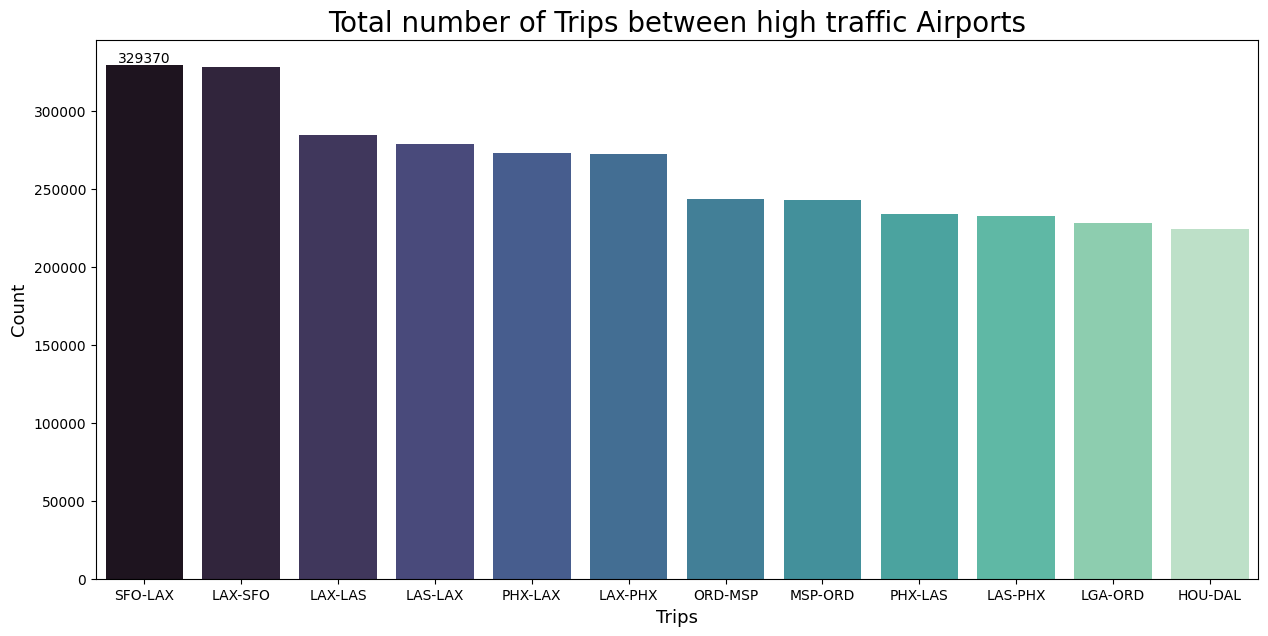

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='trips', y='count', data=df_journies_sorted, palette = "mako")
ax.bar_label(ax.containers[0])
plt.xlabel('Trips',size=13)
plt.ylabel('Count',size=13)
plt.title('Total number of Trips between high traffic Airports',size=20)

In [ ]:
drop_columns=['Unnamed: 0','CRSDepTime','CRSArrTime','ActualElapsedTime','CRSElapsedTime',
                'AirTime','Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut','CancellationCode','Diverted',
                'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df = df.drop(*drop_columns)
len(df.columns)

12

In [ ]:
df_flight = df.groupBy('UniqueCarrier', 'Cancelled').count().toPandas()

Text(0.5, 1.0, 'Airlines-Flight Cancellation Proportions')

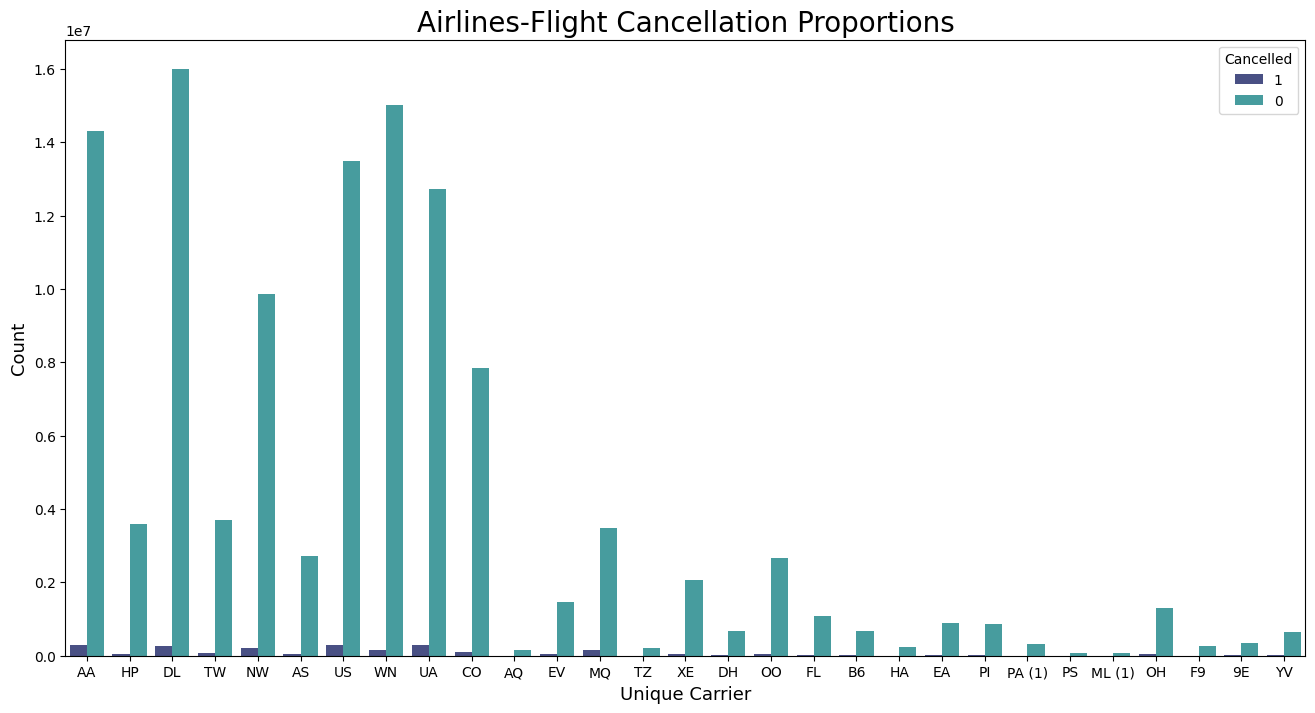

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='UniqueCarrier', y='count', hue='Cancelled', data=df_flight, palette = "mako")
plt.xlabel('Unique Carrier',size=13)
plt.ylabel('Count',size=13)
plt.title('Airlines-Flight Cancellation Proportions',size=20)

In [ ]:
df_year = df.groupBy('Year', 'Cancelled').count().toPandas()

Text(0.5, 1.0, 'Yearly-Flight Cancellation Proportions')

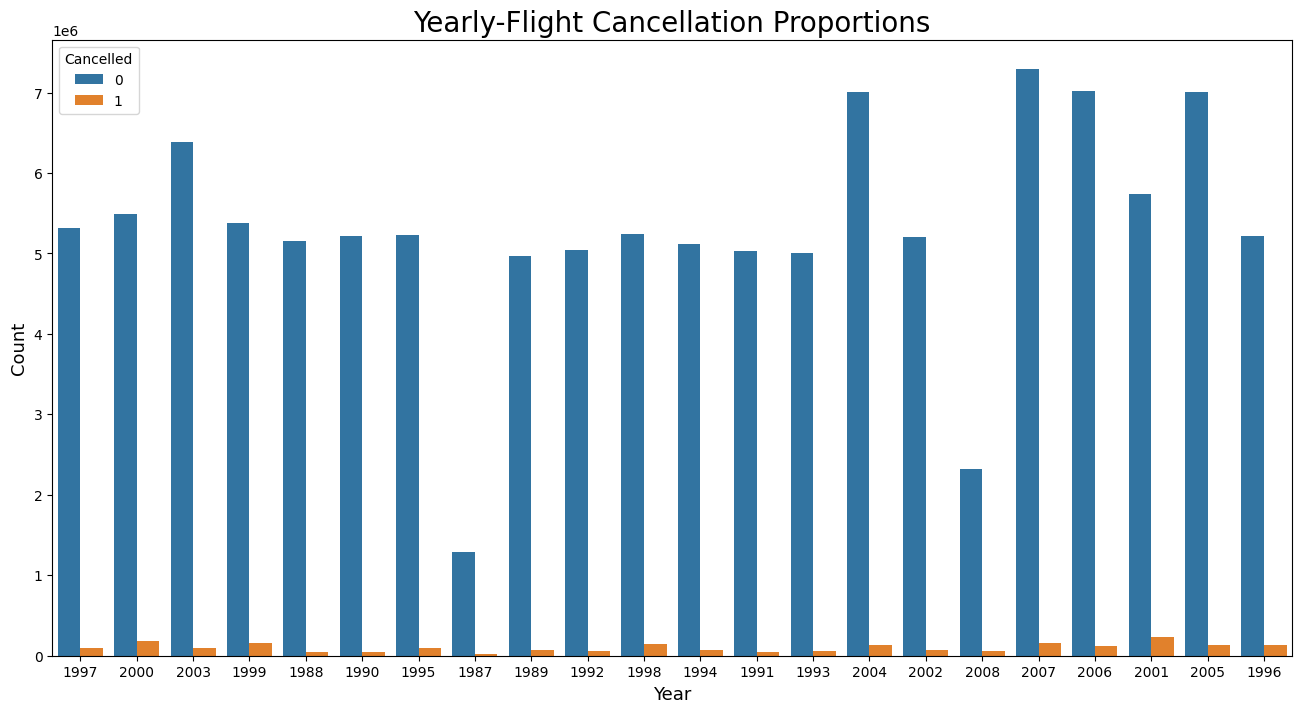

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='Year', y='count', hue='Cancelled', data=df_year)
plt.xlabel('Year',size=13)
plt.ylabel('Count',size=13)
plt.title('Yearly-Flight Cancellation Proportions',size=20)

In [ ]:
# Cancelled flights percentage in data
cancelled = df.filter(df.Cancelled==1)
cancelled = cancelled.drop('Cancelled')
cancelled.show()

+----+-----+----------+---------+-------+-------+-------------+---------+-------+--------+--------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|ArrTime|UniqueCarrier|FlightNum|TailNum|ArrDelay|DepDelay|
+----+-----+----------+---------+-------+-------+-------------+---------+-------+--------+--------+
|1997|    1|        28|        2|     NA|     NA|           WN|     1427| UNKNOW|      NA|      NA|
|1997|    1|        30|        4|     NA|     NA|           WN|     1579| UNKNOW|      NA|      NA|
|1997|    1|         3|        5|     NA|     NA|           WN|     1866| UNKNOW|      NA|      NA|
|1997|    1|         6|        1|     NA|     NA|           DL|      755| N611DL|      NA|      NA|
|1997|    1|        29|        3|     NA|     NA|           DL|      755| N673DL|      NA|      NA|
|1997|    1|        16|        4|     NA|     NA|           DL|      989| N685DA|      NA|      NA|
|1997|    1|        15|        3|     NA|     NA|           HP|     2611| N901AW|      NA|      NA|


In [ ]:
cancelled_UniqueCarrier = cancelled.groupBy('UniqueCarrier').count().select('UniqueCarrier', f.col('Count')).toPandas()
cancelled_UniqueCarrier.set_index('UniqueCarrier', inplace=True)

<Axes: title={'center': 'Which airline cancelled flights highest number of times?'}, ylabel='Count'>

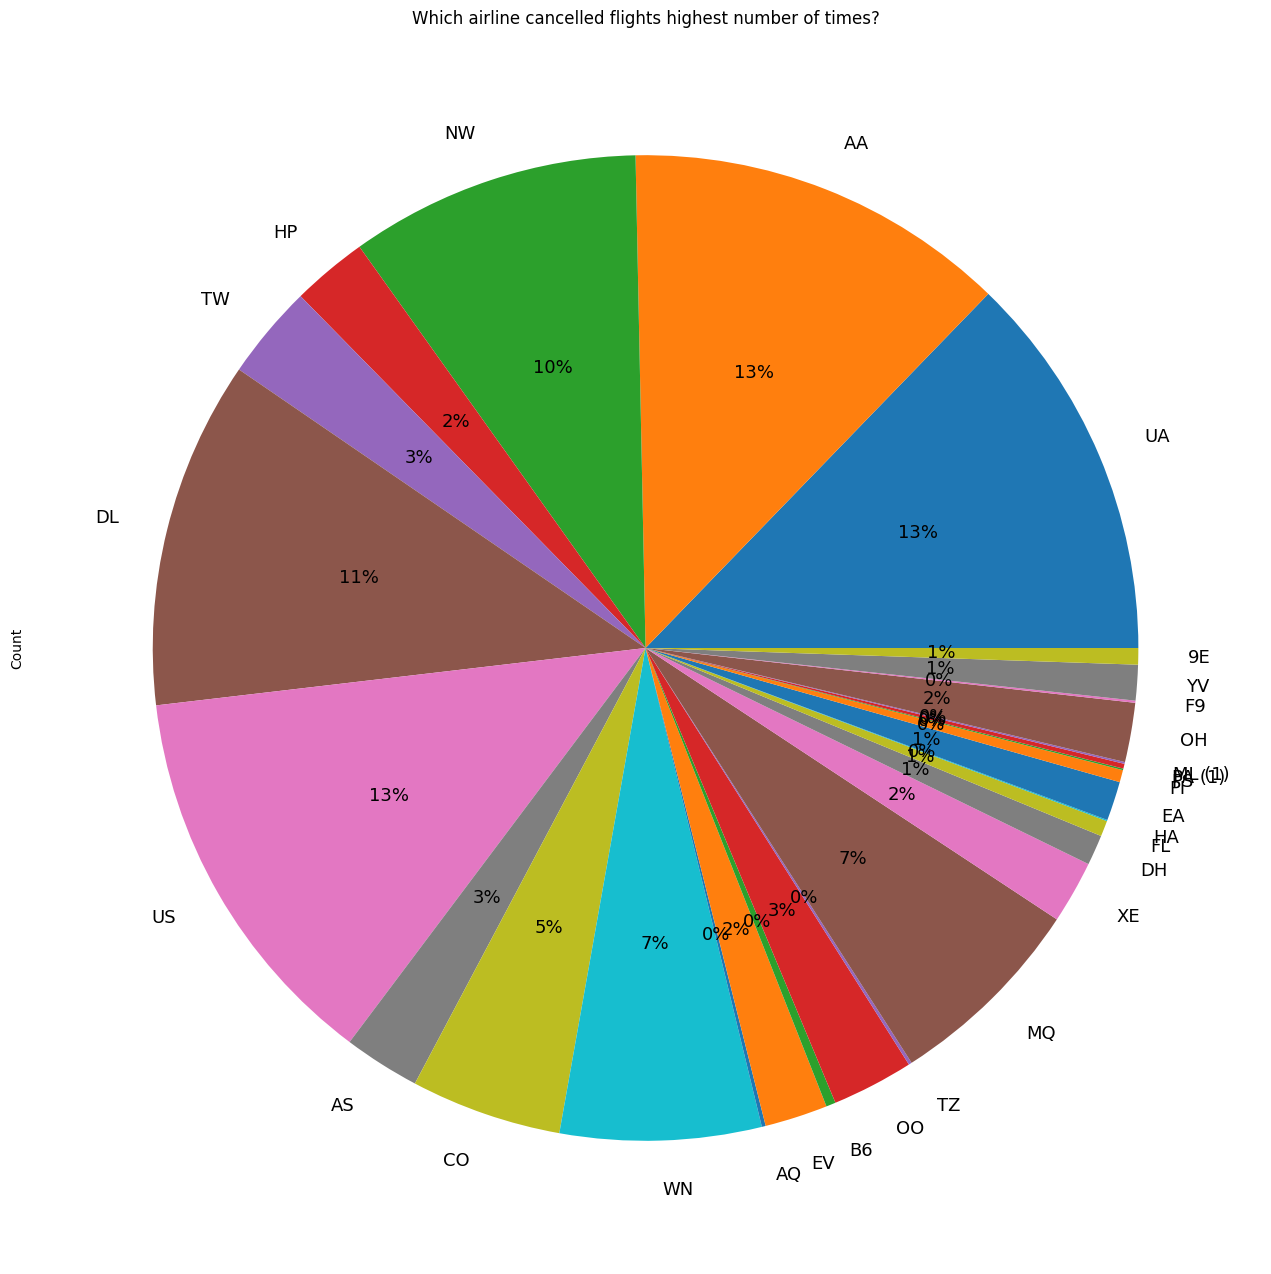

In [ ]:
cancelled_UniqueCarrier.plot(kind='pie', y='Count', autopct='%1.0f%%', fontsize=13, legend=False,
                            title='Which airline cancelled flights highest number of times?',
                            figsize=(16,16))

In [ ]:
cancelled_year = cancelled.groupBy('Year').count().select('Year', f.col('Count')).toPandas()
cancelled_year.set_index('Year', inplace=True)

In [ ]:
cancelled_year_counts = cancelled_year['Count']
year_text = ['{:0.1f}%'.format(v) for v in (cancelled_year_counts/cancelled.count()*100)]

<ipython-input-67-cad95f7a3f78>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancelled_year.index,y=cancelled_year_counts, palette = "mako");


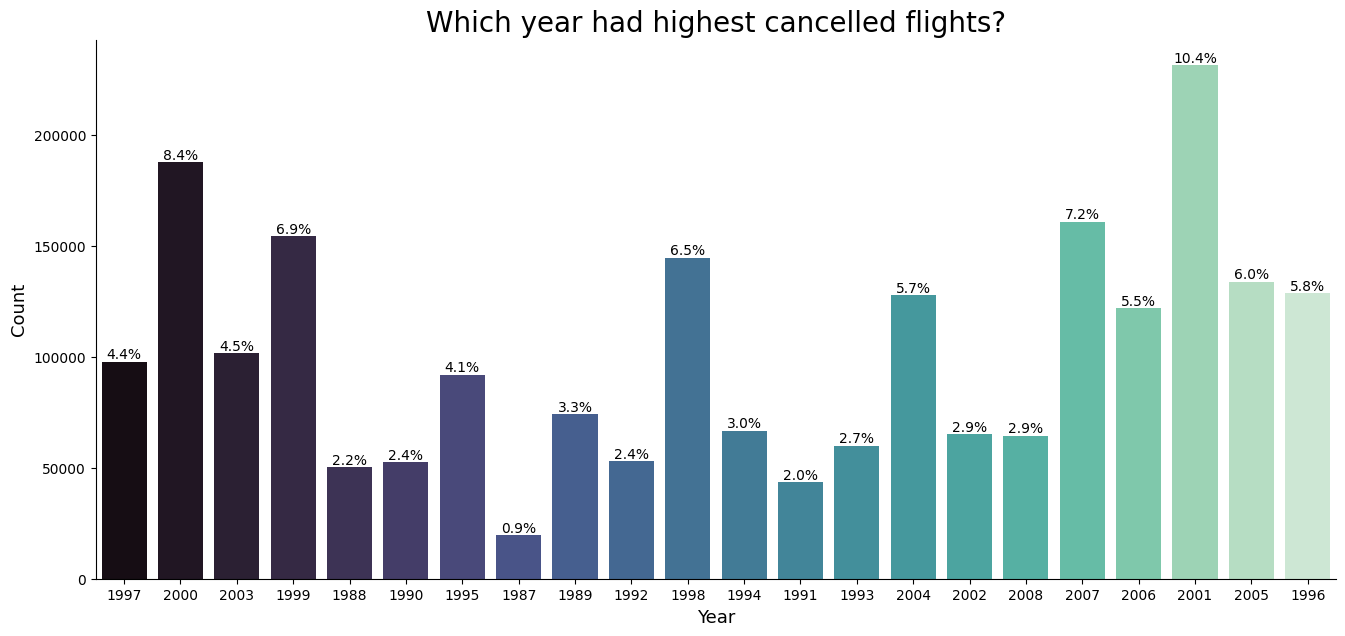

In [ ]:
base_color = '#539ecd'
alt=sns.color_palette()[1]
plt.figure(figsize=(16,7))
colors = [base_color if (x < cancelled_year_counts.max()) else alt for x in cancelled_year_counts]
sns.barplot(x=cancelled_year.index,y=cancelled_year_counts, palette = "mako");
plt.xlabel('Year',size=13)
plt.ylabel('Count',size=13)
plt.title('Which year had highest cancelled flights?',size=20)

for i in range (cancelled_year_counts.shape[0]):
    plt.text(i,
             cancelled_year_counts.values[i],
             year_text[i],
             ha='center',
             va='bottom')
sns.despine()

In [ ]:
df = df.filter(df.Cancelled==0)
flight = df.drop('Cancelled')

In [ ]:
flight.na.drop()

DataFrame[Year: string, Month: string, DayofMonth: string, DayOfWeek: string, DepTime: string, ArrTime: string, UniqueCarrier: string, FlightNum: string, TailNum: string, ArrDelay: string, DepDelay: string]

In [ ]:
flight.count()

116684126

In [ ]:
year = flight.groupBy('Year').count().select('Year', f.col('Count')).toPandas()
year.set_index('Year', inplace=True)

In [ ]:
Year_counts = year['Count']
year_text = ['{:0.1f}%'.format(v) for v in (Year_counts/flight.count()*100)]

In [ ]:
Year_counts

,Count
Year,
1997,5314080
2000,5495557
2003,6387071
1999,5373573
1988,5151933
1990,5218435
1995,5235530
1987,1292141
1989,4967035


<ipython-input-74-58b3eca422d2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year.index,y=Year_counts, palette = "mako");


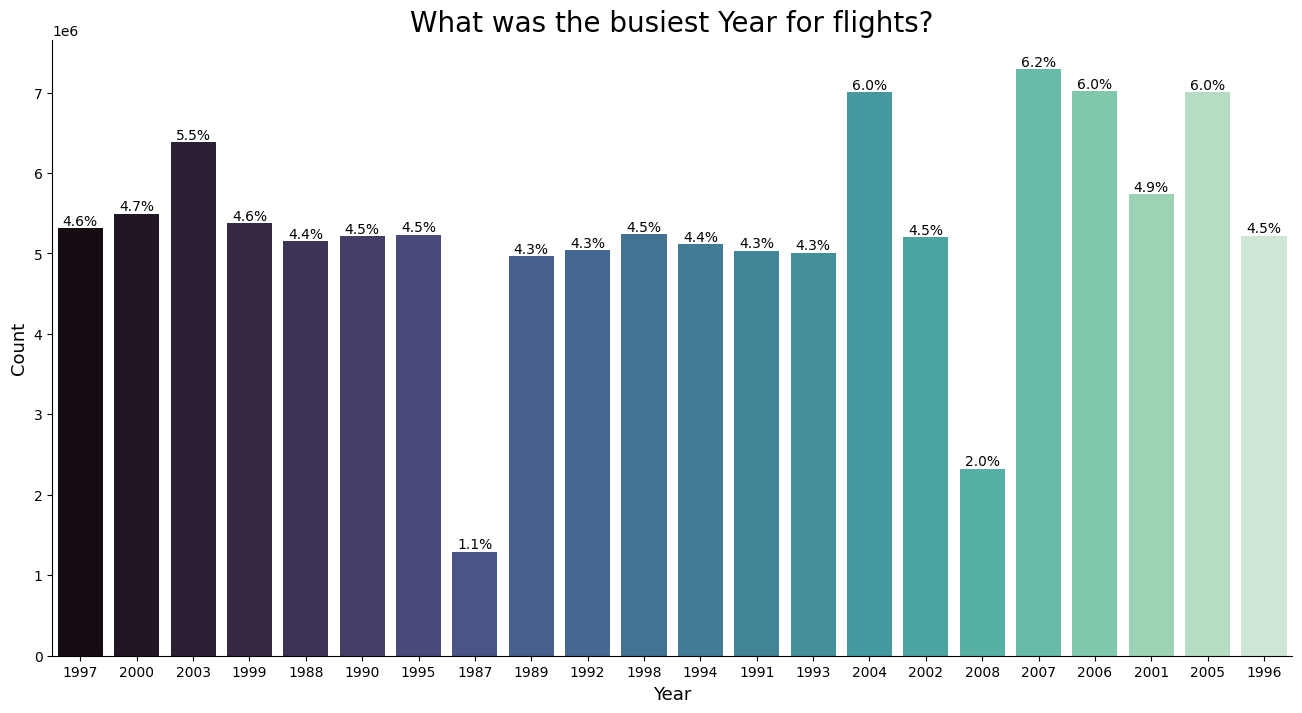

In [ ]:
base_color = '#539ecd'
alt=sns.color_palette()[1]
plt.figure(figsize=(16,8))
colors = [base_color if (x < Year_counts.max()) else alt for x in Year_counts]
sns.barplot(x=year.index,y=Year_counts, palette = "mako");
plt.xlabel('Year',size=13)
plt.ylabel('Count',size=13)
plt.title('What was the busiest Year for flights?',size=20)

for i in range (Year_counts.shape[0]):
    plt.text(i,
             Year_counts.values[i],
             year_text[i],
             ha='center',
             va='bottom')
sns.despine()

In [ ]:
month = flight.groupBy('Month').count().select('Month', f.col('Count')).toPandas()
month.set_index('Month', inplace=True)

In [ ]:
Month_counts = month['Count']
Month_text = ['{:0.1f}%'.format(v) for v in (Month_counts/flight.count()*100)]

<ipython-input-77-cb1cb3692061>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month.index,y=Month_counts , palette = "mako");


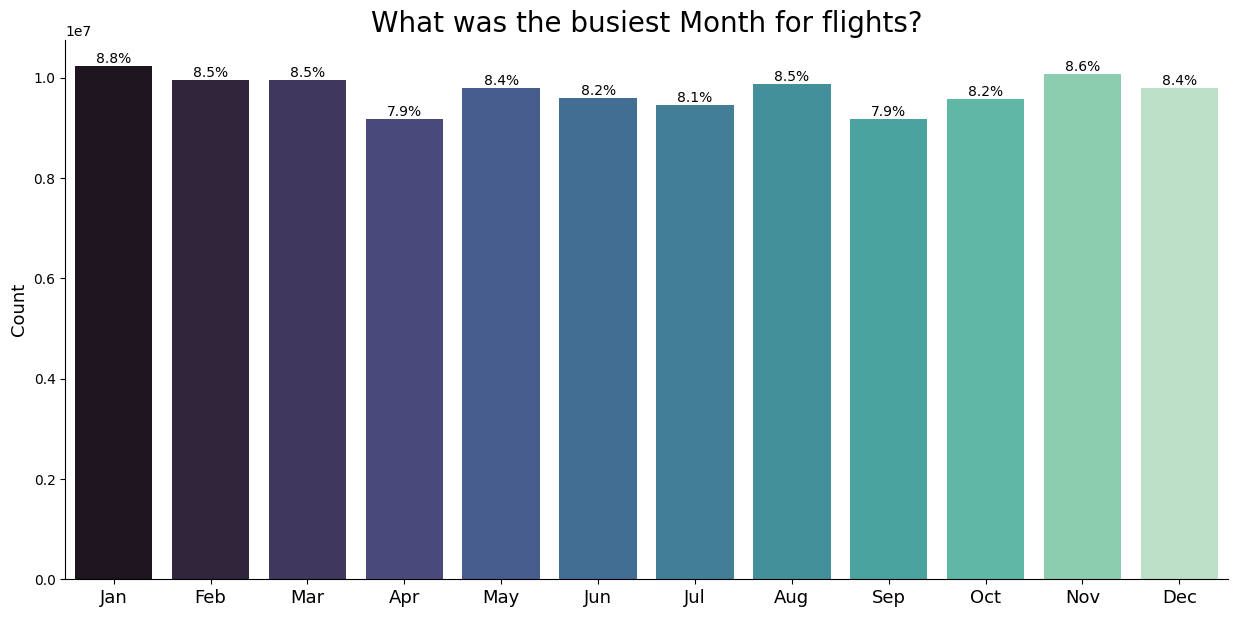

In [ ]:
plt.figure(figsize=(15,7))
colors = [base_color if (x < Month_counts.max()) else alt for x in Month_counts ]
sns.barplot(x=month.index,y=Month_counts , palette = "mako");
plt.xlabel('',size=13)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],
           labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],size=13)
plt.ylabel('Count',size=13)
plt.title('What was the busiest Month for flights?',size=20)
sns.despine()
for i in range (Month_counts.shape[0]):
    plt.text(i,
             Month_counts.values[i],
             Month_text[i],
             ha='center',
             va='bottom')

In [ ]:
day = flight.groupBy('DayofMonth').count().select('DayofMonth', f.col('Count')).toPandas()

In [ ]:
day['DayofMonth'] = [ int(i) for i in day['DayofMonth']]
day_sorted = day.sort_values(by=['DayofMonth'], ascending=True)
day_sorted.head()

,DayofMonth,Count
22,1,3813790
30,2,3833628
4,3,3822338
25,4,3800314
10,5,3826832


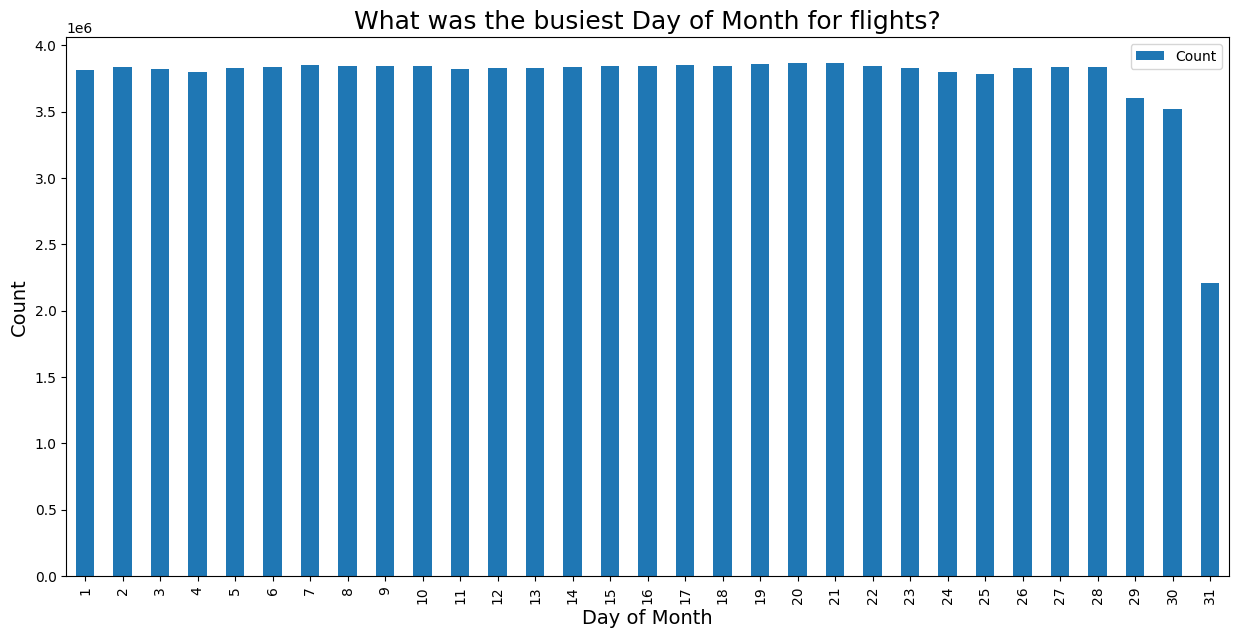

In [ ]:
day_sorted.plot.bar(x='DayofMonth', y=['Count'], figsize=(15,7))
plt.xlabel("Day of Month", size=14)
plt.ylabel("Count", size=14)
plt.title("What was the busiest Day of Month for flights?", size=18)
plt.show()

In [ ]:
week_days = flight.groupBy('DayOfWeek').count().select('DayOfWeek', f.col('Count')).toPandas()
week_days.set_index('DayOfWeek', inplace=True)

In [ ]:
DayOfWeek_counts = week_days['Count']
DayOfWeek_text = ['{:0.1f}%'.format(v) for v in (DayOfWeek_counts/flight.count()*100)]

<ipython-input-83-36e13249f7af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=week_days.index,y=DayOfWeek_counts, palette = "mako");


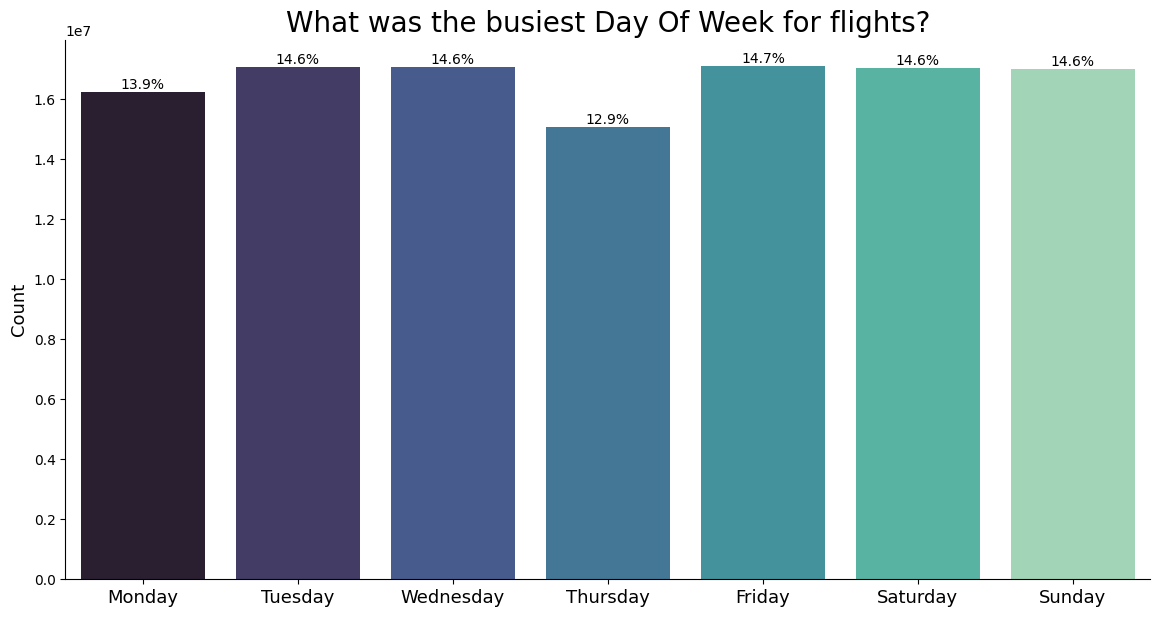

In [ ]:
plt.figure(figsize=(14,7))
colors = [base_color if (x < DayOfWeek_counts.max()) else alt for x in DayOfWeek_counts ]
sns.barplot(x=week_days.index,y=DayOfWeek_counts, palette = "mako");
plt.xlabel('',size=20)
plt.xticks(ticks=[0,1,2,3,4,5,6],
           labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],size=13)
plt.ylabel('Count',size=13)
plt.title('What was the busiest Day Of Week for flights?',size=20)
sns.despine()
for i in range (DayOfWeek_counts.shape[0]):
    plt.text(i,
             DayOfWeek_counts.values[i],
             DayOfWeek_text[i],
             ha='center',
             va='bottom')

In [ ]:
unique_carrier = flight.groupBy('UniqueCarrier').count().select('UniqueCarrier', f.col('Count')).toPandas()
unique_carrier.set_index('UniqueCarrier', inplace=True)

In [ ]:
carrier_counts = unique_carrier['Count']
carrier_text = ['{:0.1f}%'.format(v) for v in (carrier_counts/flight.count()*100)]

<ipython-input-86-ff148c0bd108>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_carrier.index,y=carrier_counts,order=carrier_counts.index , palette = "mako");


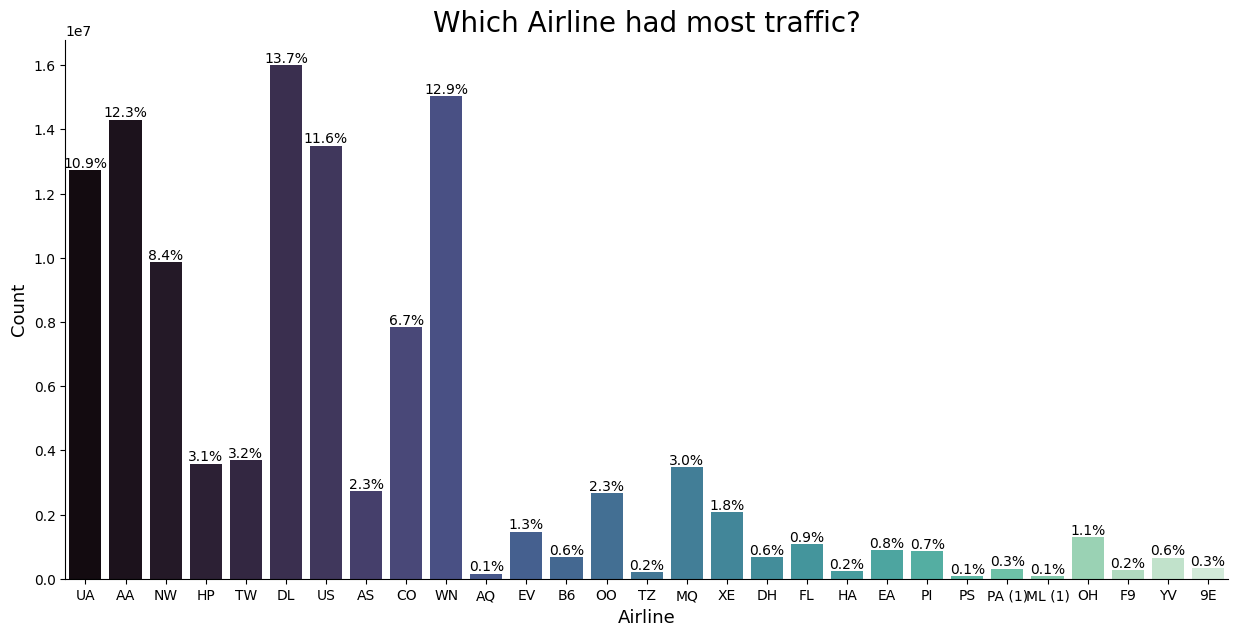

In [ ]:
plt.figure(figsize=(15,7))
colors = [base_color if (x < carrier_counts.max()) else alt for x in carrier_counts ]
sns.barplot(x=unique_carrier.index,y=carrier_counts,order=carrier_counts.index , palette = "mako");
plt.xlabel('Airline',size=13)
plt.ylabel('Count',size=13)
plt.title('Which Airline had most traffic?',size=20)
sns.despine()
for i in range (carrier_counts.shape[0]):
    plt.text(i,
             carrier_counts.values[i],
            carrier_text[i],
             ha='center',
             va='bottom')